# Week 1 Image classification

The notebook is a machine learning exercise

## loading packages

In [1]:
## add the three lines first
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import re

## Load image data

In [5]:
## quite slow.... and it's also broken in the middle once; about 15-20 mins
## get path of the image data from fastai
path = untar_data(URLs.PETS); path

PosixPath('/Users/qingli/.fastai/data/oxford-iiit-pet')

In [6]:
## all folers under path;
path.ls()

[PosixPath('/Users/qingli/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/Users/qingli/.fastai/data/oxford-iiit-pet/annotations')]

In [7]:
## assign sub path to the individual folder under path.
path_anno = path/'annotations'
path_img = path/'images'

In [8]:
path_anno.ls()

[PosixPath('/Users/qingli/.fastai/data/oxford-iiit-pet/annotations/list.txt'),
 PosixPath('/Users/qingli/.fastai/data/oxford-iiit-pet/annotations/xmls'),
 PosixPath('/Users/qingli/.fastai/data/oxford-iiit-pet/annotations/README'),
 PosixPath('/Users/qingli/.fastai/data/oxford-iiit-pet/annotations/trainval.txt'),
 PosixPath('/Users/qingli/.fastai/data/oxford-iiit-pet/annotations/trimaps'),
 PosixPath('/Users/qingli/.fastai/data/oxford-iiit-pet/annotations/test.txt'),
 PosixPath('/Users/qingli/.fastai/data/oxford-iiit-pet/annotations/._trimaps')]

In [19]:
## how many images in the dataset
print (len (path_img.ls()))
## the first six image paths
path_img.ls()[:6]

7393


[PosixPath('/Users/qingli/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),
 PosixPath('/Users/qingli/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),
 PosixPath('/Users/qingli/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),
 PosixPath('/Users/qingli/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),
 PosixPath('/Users/qingli/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg'),
 PosixPath('/Users/qingli/.fastai/data/oxford-iiit-pet/images/Siamese_53.jpg')]

In [20]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/Users/qingli/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),
 PosixPath('/Users/qingli/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),
 PosixPath('/Users/qingli/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),
 PosixPath('/Users/qingli/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),
 PosixPath('/Users/qingli/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg')]

## Have a look at the data

In [26]:
## set random seed
np.random.seed(234)
## regular expressions pattern
pat = r'/([^/]+)_\d+.jpg$'

In [27]:
## there will be an error if put bs=bs as an argument;
## what are the other arguments mean? what is size?

data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224
                                  ).normalize(imagenet_stats)

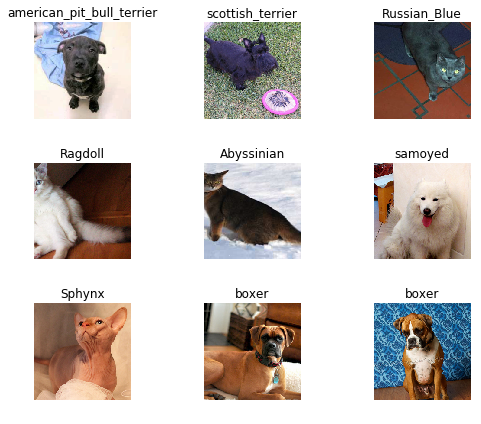

In [28]:
## showing the figure we 
data.show_batch(rows=3, figsize=(7,6))

In [29]:
## breed names I guess
print(data.classes)
## what is data.c?
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [56]:
## how many images for each breed

pat = re.compile(pat)
all_names = []
for i in range(len(fnames)):
 all_names.append(pat.search(fnames[i].name).group(1))

In [72]:
for i in range(37):
    count = all_names.count(data.classes[i])
    print (data.classes[i],count)

Abyssinian 200
Bengal 200
Birman 200
Bombay 200
British_Shorthair 200
Egyptian_Mau 200
Maine_Coon 200
Persian 200
Ragdoll 200
Russian_Blue 200
Siamese 200
Sphynx 200
american_bulldog 200
american_pit_bull_terrier 200
basset_hound 200
beagle 200
boxer 200
chihuahua 200
english_cocker_spaniel 200
english_setter 200
german_shorthaired 200
great_pyrenees 200
havanese 200
japanese_chin 200
keeshond 200
leonberger 200
miniature_pinscher 200
newfoundland 200
pomeranian 200
pug 200
saint_bernard 200
samoyed 200
scottish_terrier 199
shiba_inu 200
staffordshire_bull_terrier 191
wheaten_terrier 200
yorkshire_terrier 200


## Learning models from the data

In [30]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/qingli/.torch/models/resnet34-333f7ec4.pth
87306240it [00:54, 1595556.19it/s]


In [73]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
